# Exploratory Data Analysis for Chemical Blend Dataset

This notebook performs comprehensive EDA on the training dataset which contains:
- Component fractions (5 components)
- Component properties (10 properties per component)
- Blend properties (10 blend properties)

Total: 65 features for 2000 samples

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('train.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset size: {df.size} values")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (2000, 65)
Dataset size: 130000 values
Memory usage: 0.99 MB


In [4]:
# Basic info about the dataset
print("Dataset Info:")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Data types: {df.dtypes.value_counts()}")
print("\nFirst 5 rows:")
df.head()

Dataset Info:
Number of rows: 2000
Number of columns: 65
Data types: float64    65
Name: count, dtype: int64

First 5 rows:


,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values found: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset!")

Missing values found: 0
No missing values found in the dataset!


In [6]:
# Basic statistical summary
print("Basic Statistical Summary:")
df.describe()

Basic Statistical Summary:


,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.18069,0.182910,0.179820,0.342090,0.114490,0.000245,-0.017319,0.001703,-0.004653,-0.018256,...,-0.016879,-0.002076,-0.014351,-0.006068,-0.015249,-0.003497,-0.013568,-0.017236,-0.001507,-0.001795
std,0.16320,0.163704,0.166283,0.141119,0.080219,0.999423,1.006409,0.998859,1.006902,1.009294,...,0.993787,1.004512,0.999360,1.009176,0.986480,1.009126,1.000613,0.998759,1.001096,0.990433
min,0.00000,0.000000,0.000000,0.010000,0.000000,-2.943737,-1.718895,-3.008683,-3.029468,-3.572440,...,-2.550897,-3.079759,-3.041624,-2.835701,-1.730111,-2.808210,-2.994571,-3.621080,-3.292727,-2.476429
25%,0.03000,0.040000,0.020000,0.220000,0.050000,-0.694658,-0.765154,-0.701948,-0.693361,-0.713149,...,-0.766128,-0.735109,-0.624235,-0.783547,-0.683165,-0.697379,-0.622453,-0.725564,-0.702384,-0.733653
50%,0.14000,0.150000,0.140000,0.350000,0.120000,0.011977,-0.030235,0.021335,0.016774,0.194936,...,-0.021089,0.001684,0.146135,-0.028158,-0.250650,-0.011649,0.133470,-0.001548,-0.002604,-0.010459
75%,0.29000,0.300000,0.290000,0.500000,0.180000,0.685717,0.653960,0.673125,0.659227,1.032029,...,0.714763,0.723807,0.727597,0.664659,0.358701,0.695182,0.704130,0.684894,0.706084,0.693839
max,0.50000,0.500000,0.500000,0.500000,0.290000,2.981146,3.051090,2.868901,2.982258,1.032029,...,2.856588,2.769156,1.638646,3.769643,3.600439,3.433292,3.293228,3.340657,3.276199,2.708703


## 1. Component Fractions Analysis

Component fraction columns: ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']

Fraction sums statistics:
Mean: 1.0000
Std: 0.0000
Min: 1.0000
Max: 1.0000


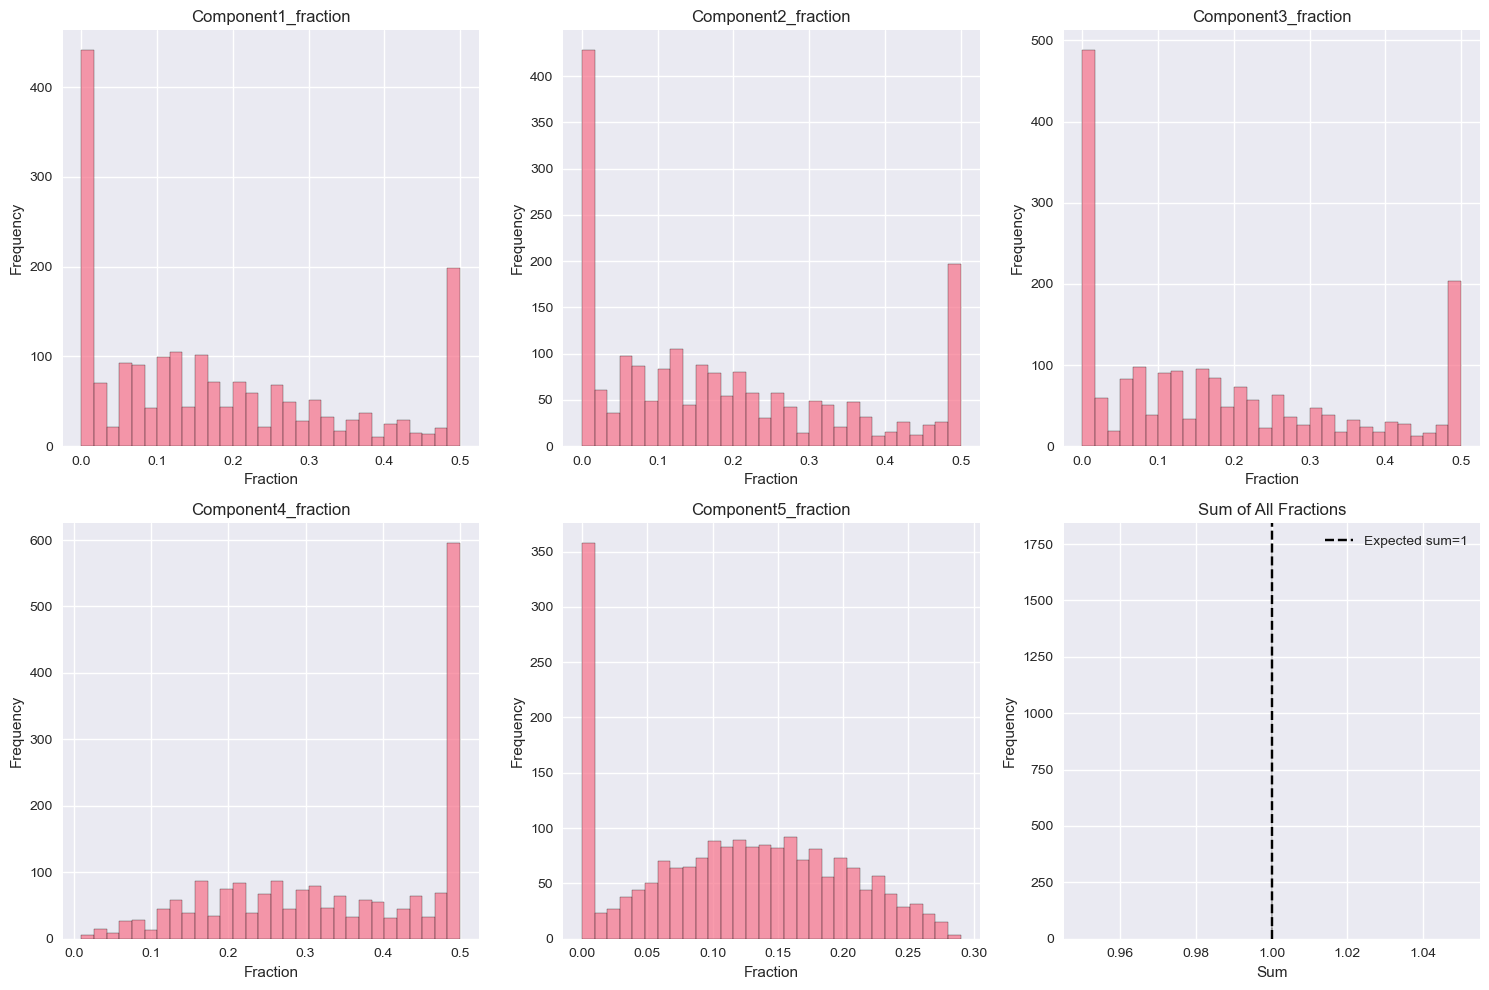

In [7]:
# Extract component fractions
fraction_cols = [col for col in df.columns if 'fraction' in col]
print(f"Component fraction columns: {fraction_cols}")

# Check if fractions sum to 1
fraction_sums = df[fraction_cols].sum(axis=1)
print(f"\nFraction sums statistics:")
print(f"Mean: {fraction_sums.mean():.4f}")
print(f"Std: {fraction_sums.std():.4f}")
print(f"Min: {fraction_sums.min():.4f}")
print(f"Max: {fraction_sums.max():.4f}")

# Plot fraction distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(fraction_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Fraction')
    axes[i].set_ylabel('Frequency')

# Plot sum of fractions
axes[5].hist(fraction_sums, bins=30, alpha=0.7, edgecolor='black', color='red')
axes[5].set_title('Sum of All Fractions')
axes[5].set_xlabel('Sum')
axes[5].set_ylabel('Frequency')
axes[5].axvline(x=1, color='black', linestyle='--', label='Expected sum=1')
axes[5].legend()

plt.tight_layout()
plt.show()

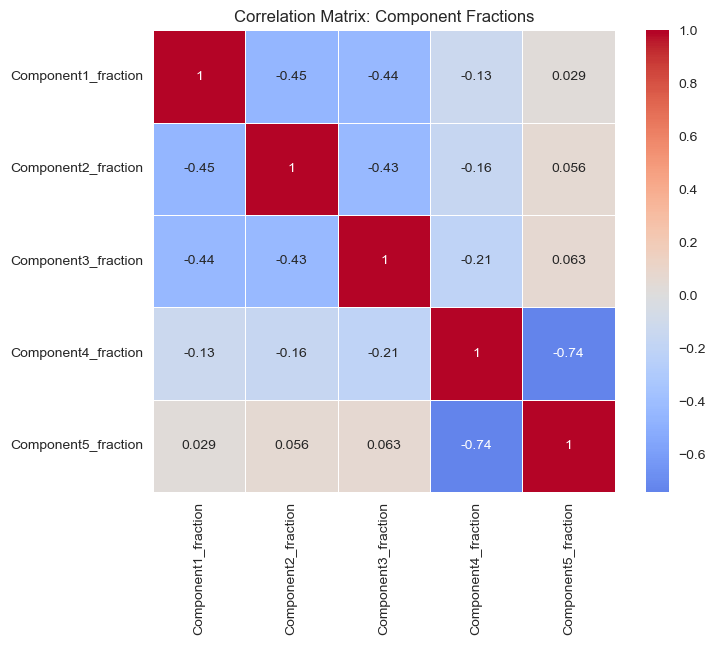

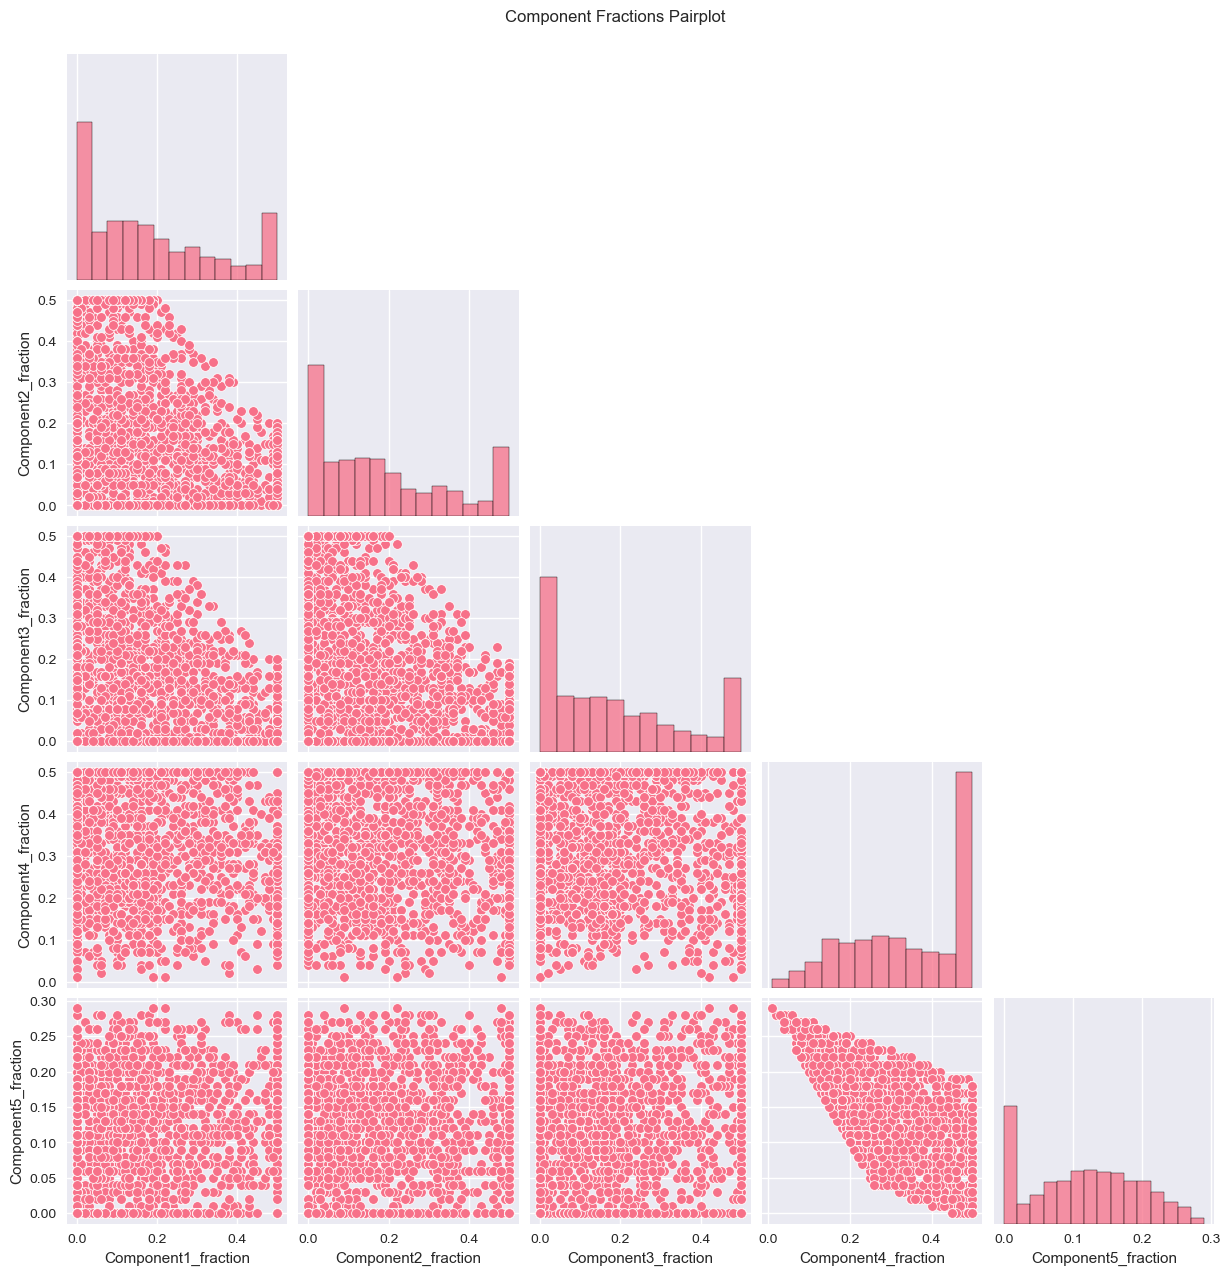

In [8]:
# Correlation between component fractions
plt.figure(figsize=(8, 6))
sns.heatmap(df[fraction_cols].corr(), annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Component Fractions')
plt.show()

# Pairplot of fractions
g = sns.pairplot(df[fraction_cols], diag_kind='hist', corner=True)
g.fig.suptitle('Component Fractions Pairplot', y=1.02)
plt.show()

## 2. Component Properties Analysis

Component1 properties: 10 columns
Component2 properties: 10 columns
Component3 properties: 10 columns
Component4 properties: 10 columns
Component5 properties: 10 columns


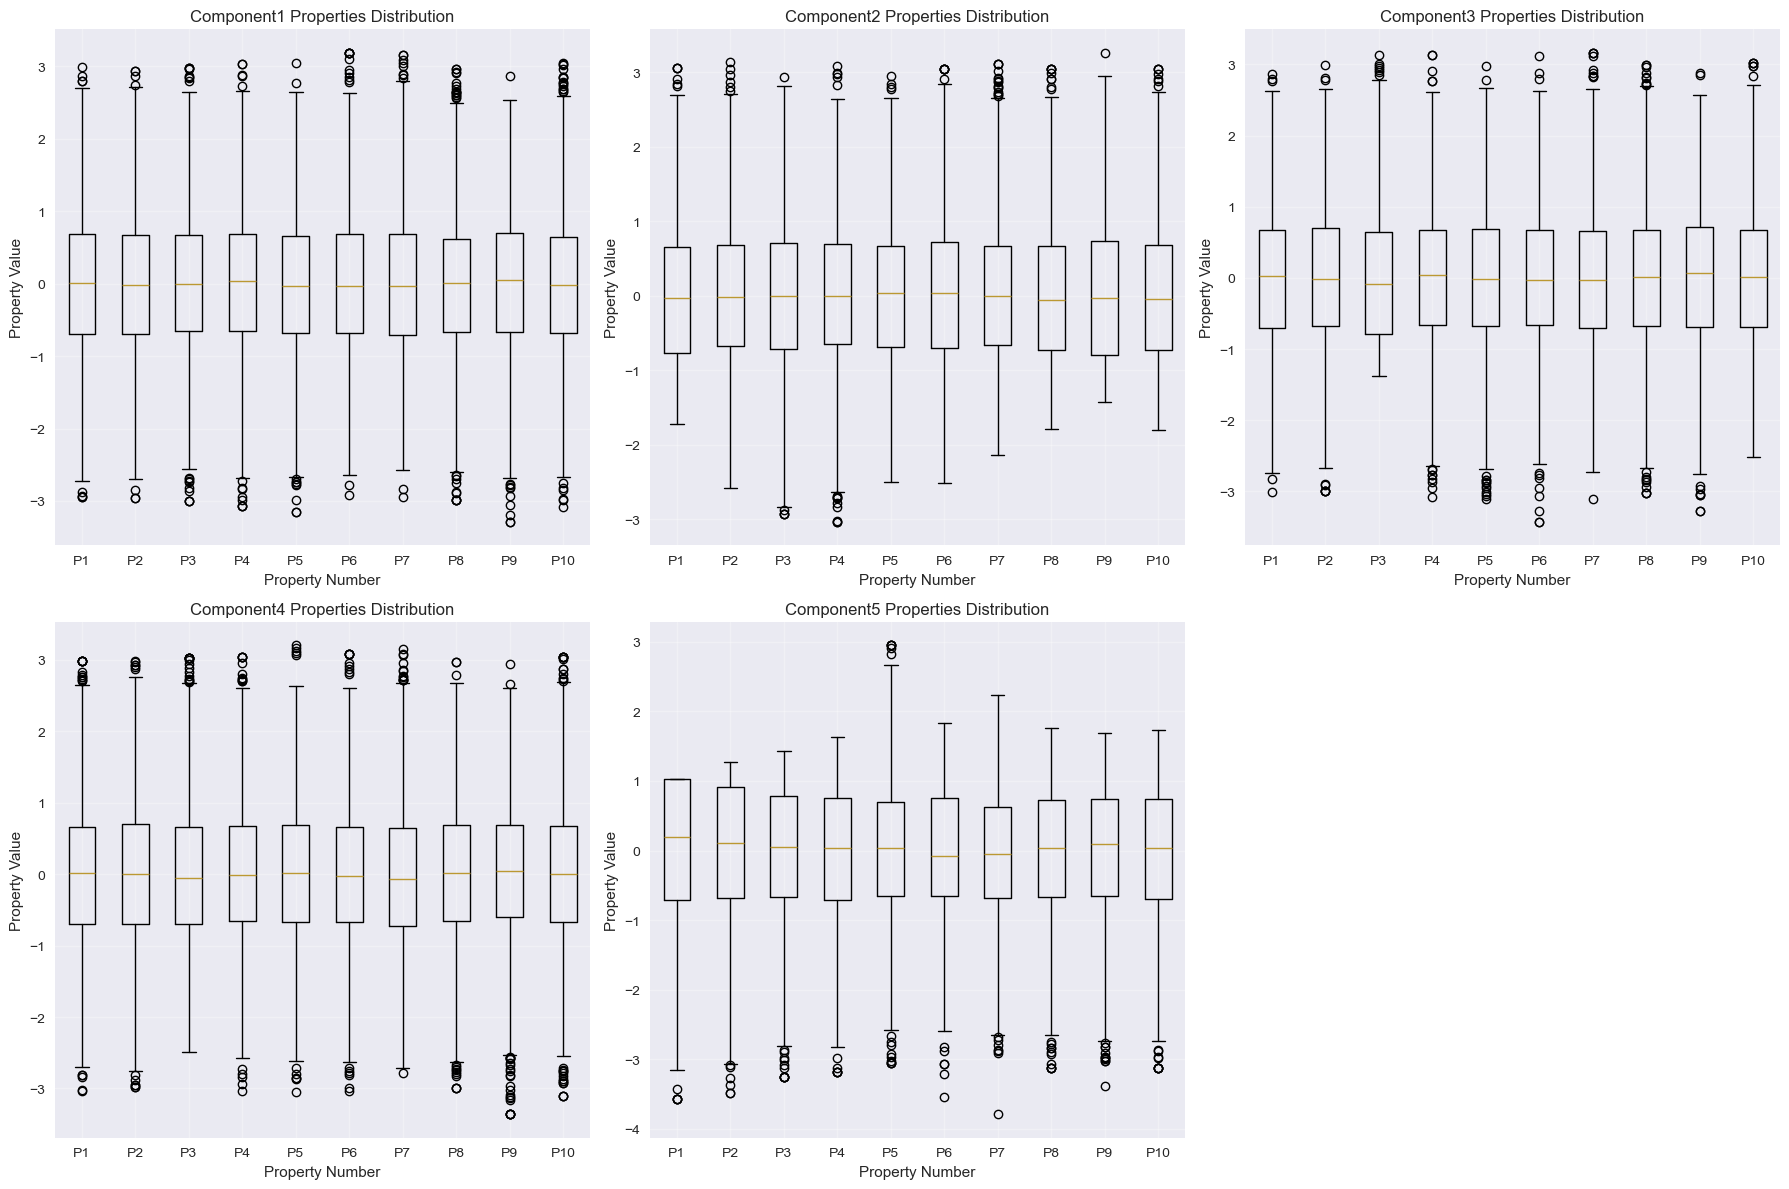

In [ ]:
# Extract component properties for each component
components = ['Component1', 'Component2', 'Component3', 'Component4', 'Component5']
property_cols = {}

for comp in components:
    property_cols[comp] = [col for col in df.columns if comp in col and 'Property' in col]
    print(f"{comp} properties: {len(property_cols[comp])} columns")

# Statistics for each component's properties
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, comp in enumerate(components):
    comp_data = df[property_cols[comp]]
    
    # Box plot for the component
    axes[i].boxplot([comp_data[col] for col in comp_data.columns], 
                   labels=[f'P{j+1}' for j in range(len(comp_data.columns))])
    axes[i].set_title(f'{comp} Properties Distribution')
    axes[i].set_ylabel('Property Value')
    axes[i].set_xlabel('Property Number')
    axes[i].grid(True, alpha=0.3)

# Remove the extra subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [10]:
# Statistical summary for each property across components
property_stats = pd.DataFrame()

for i in range(1, 11):  # Properties 1-10
    prop_cols = [f'Component{j}_Property{i}' for j in range(1, 6)]
    
    stats_row = {
        'Property': f'Property{i}',
        'Mean': df[prop_cols].mean().mean(),
        'Std': df[prop_cols].std().mean(),
        'Min': df[prop_cols].min().min(),
        'Max': df[prop_cols].max().max(),
        'Range': df[prop_cols].max().max() - df[prop_cols].min().min()
    }
    property_stats = pd.concat([property_stats, pd.DataFrame([stats_row])], ignore_index=True)

print("Statistics across all components for each property:")
property_stats

Statistics across all components for each property:


,Property,Mean,Std,Min,Max,Range
0,Property1,-0.007656,1.004177,-3.572440,3.051090,6.623531
1,Property2,0.006242,1.000817,-3.482886,3.134726,6.617613
2,Property3,-0.002858,1.002065,-3.254342,3.130809,6.385152
3,Property4,0.001472,0.999906,-3.180274,3.135173,6.315448
4,Property5,0.000524,0.998157,-3.153334,3.204864,6.358198
5,Property6,0.005932,1.001079,-3.539506,3.183023,6.722529
6,Property7,-0.002058,1.004549,-3.792333,3.162742,6.955075
7,Property8,-0.005057,0.998978,-3.122717,3.041442,6.164159
8,Property9,0.003157,1.000834,-3.390542,3.257945,6.648487
9,Property10,0.000392,1.002292,-3.124985,3.045961,6.170946


## 3. Blend Properties Analysis

Blend property columns (10): ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']


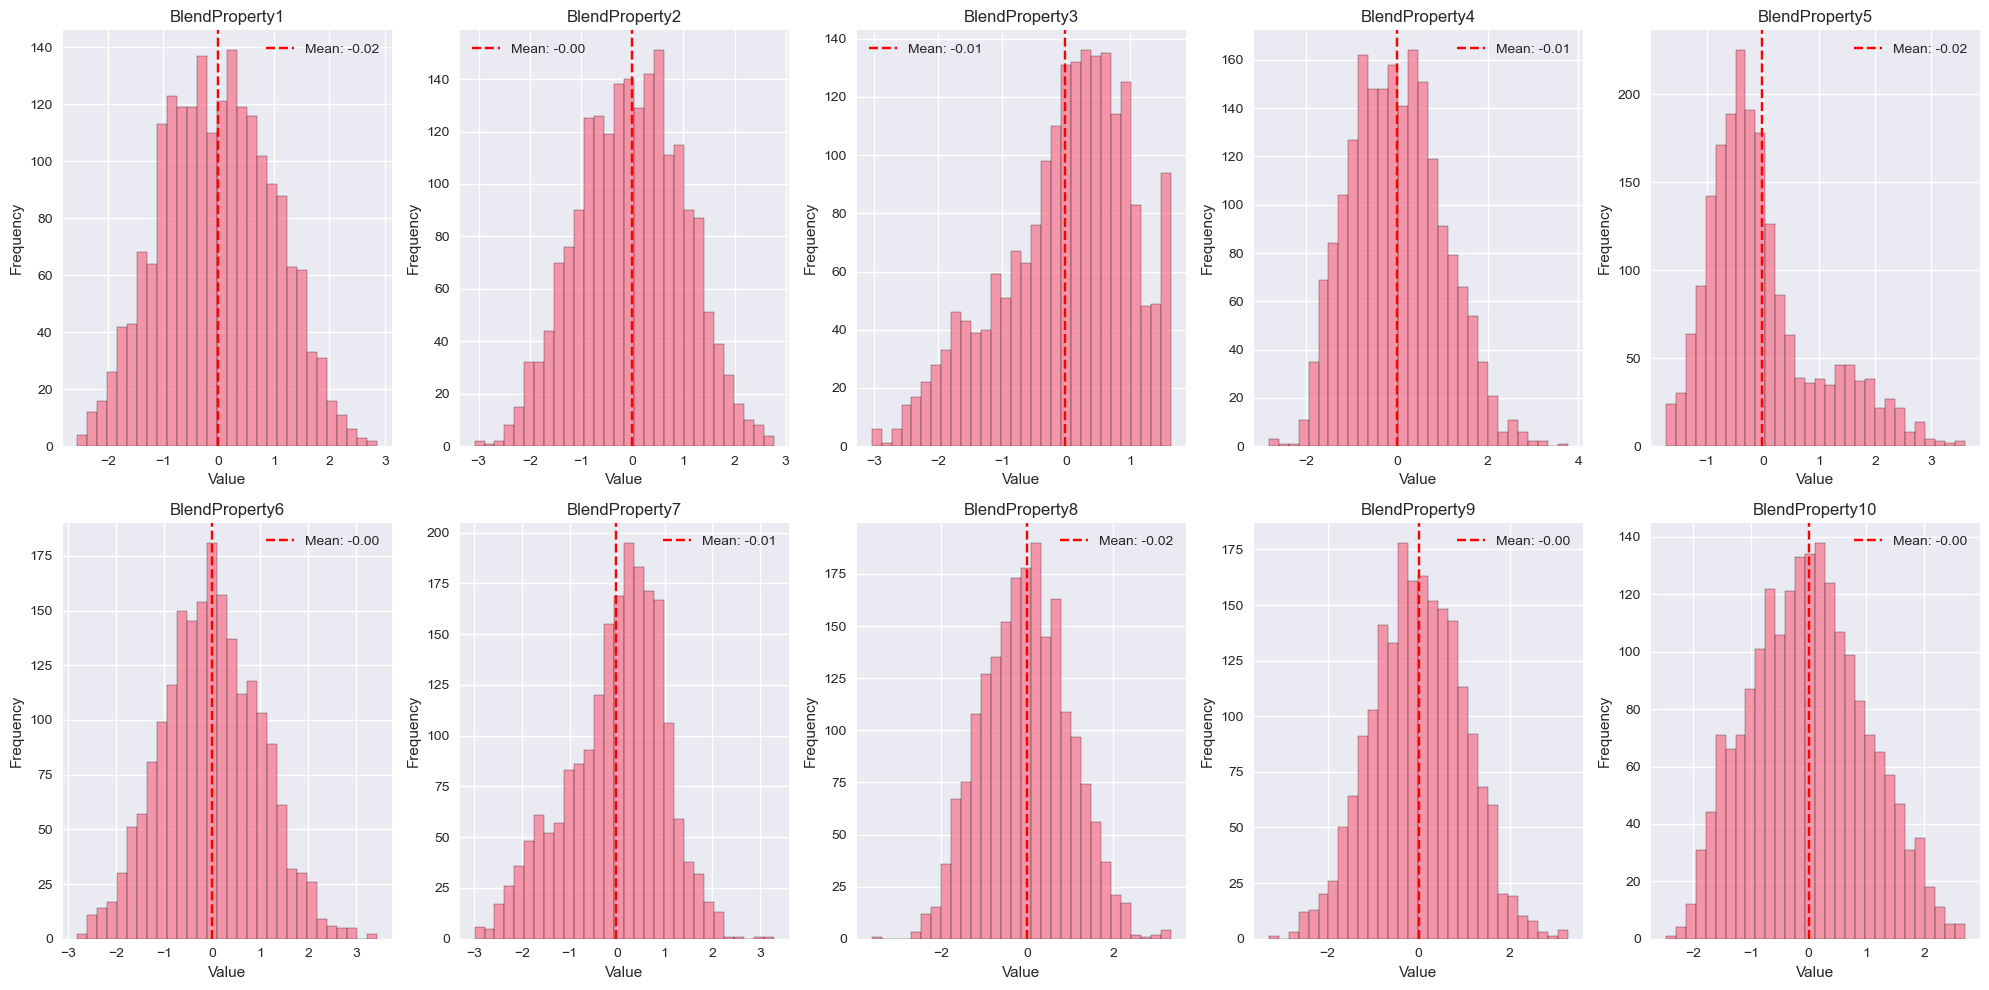


Blend Properties Statistical Summary:


,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.016879,-0.002076,-0.014351,-0.006068,-0.015249,-0.003497,-0.013568,-0.017236,-0.001507,-0.001795
std,0.993787,1.004512,0.999360,1.009176,0.986480,1.009126,1.000613,0.998759,1.001096,0.990433
min,-2.550897,-3.079759,-3.041624,-2.835701,-1.730111,-2.808210,-2.994571,-3.621080,-3.292727,-2.476429
25%,-0.766128,-0.735109,-0.624235,-0.783547,-0.683165,-0.697379,-0.622453,-0.725564,-0.702384,-0.733653
50%,-0.021089,0.001684,0.146135,-0.028158,-0.250650,-0.011649,0.133470,-0.001548,-0.002604,-0.010459
75%,0.714763,0.723807,0.727597,0.664659,0.358701,0.695182,0.704130,0.684894,0.706084,0.693839
max,2.856588,2.769156,1.638646,3.769643,3.600439,3.433292,3.293228,3.340657,3.276199,2.708703


In [ ]:
# Extract blend properties
blend_cols = [col for col in df.columns if 'BlendProperty' in col]
print(f"Blend property columns ({len(blend_cols)}): {blend_cols}")

# Distribution of blend properties
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(blend_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Add mean line
    mean_val = df[col].mean()
    axes[i].axvline(x=mean_val, color='red', linestyle='--', 
                   label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Statistical summary for blend properties
print("\nBlend Properties Statistical Summary:")
df[blend_cols].describe()


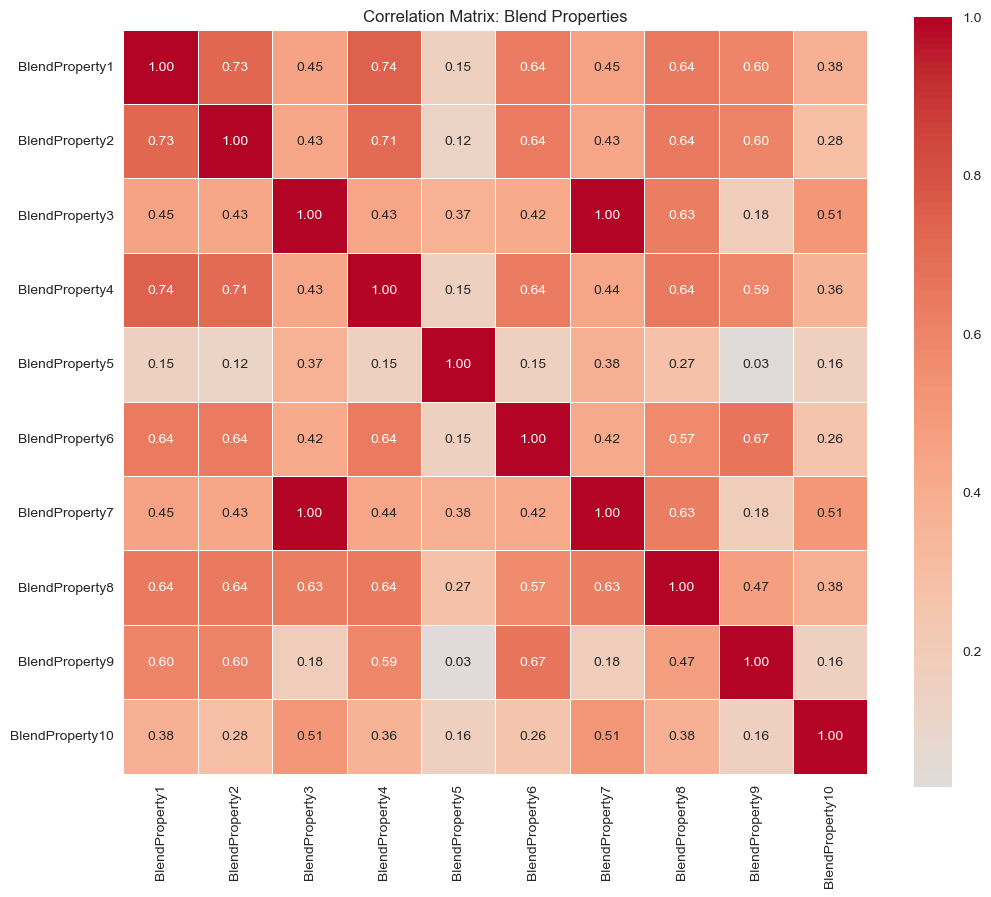


Highly correlated blend property pairs (|r| > 0.5):
BlendProperty1 vs BlendProperty2: 0.726
BlendProperty1 vs BlendProperty4: 0.743
BlendProperty1 vs BlendProperty6: 0.638
BlendProperty1 vs BlendProperty8: 0.645
BlendProperty1 vs BlendProperty9: 0.597
BlendProperty2 vs BlendProperty4: 0.706
BlendProperty2 vs BlendProperty6: 0.638
BlendProperty2 vs BlendProperty8: 0.642
BlendProperty2 vs BlendProperty9: 0.604
BlendProperty3 vs BlendProperty7: 0.997
BlendProperty3 vs BlendProperty8: 0.627
BlendProperty3 vs BlendProperty10: 0.512
BlendProperty4 vs BlendProperty6: 0.636
BlendProperty4 vs BlendProperty8: 0.642
BlendProperty4 vs BlendProperty9: 0.586
BlendProperty6 vs BlendProperty8: 0.575
BlendProperty6 vs BlendProperty9: 0.665
BlendProperty7 vs BlendProperty8: 0.629
BlendProperty7 vs BlendProperty10: 0.510


In [12]:
# Correlation matrix for blend properties
plt.figure(figsize=(12, 10))
blend_corr = df[blend_cols].corr()
sns.heatmap(blend_corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: Blend Properties')
plt.show()

# Find highly correlated pairs
corr_pairs = []
for i in range(len(blend_cols)):
    for j in range(i+1, len(blend_cols)):
        corr_val = blend_corr.iloc[i, j]
        if abs(corr_val) > 0.5:  # Threshold for high correlation
            corr_pairs.append((blend_cols[i], blend_cols[j], corr_val))

if corr_pairs:
    print("\nHighly correlated blend property pairs (|r| > 0.5):")
    for prop1, prop2, corr in corr_pairs:
        print(f"{prop1} vs {prop2}: {corr:.3f}")
else:
    print("\nNo highly correlated blend property pairs found.")

## 4. Relationship Analysis: Fractions vs Properties

Correlation between Component Fractions and Blend Properties:


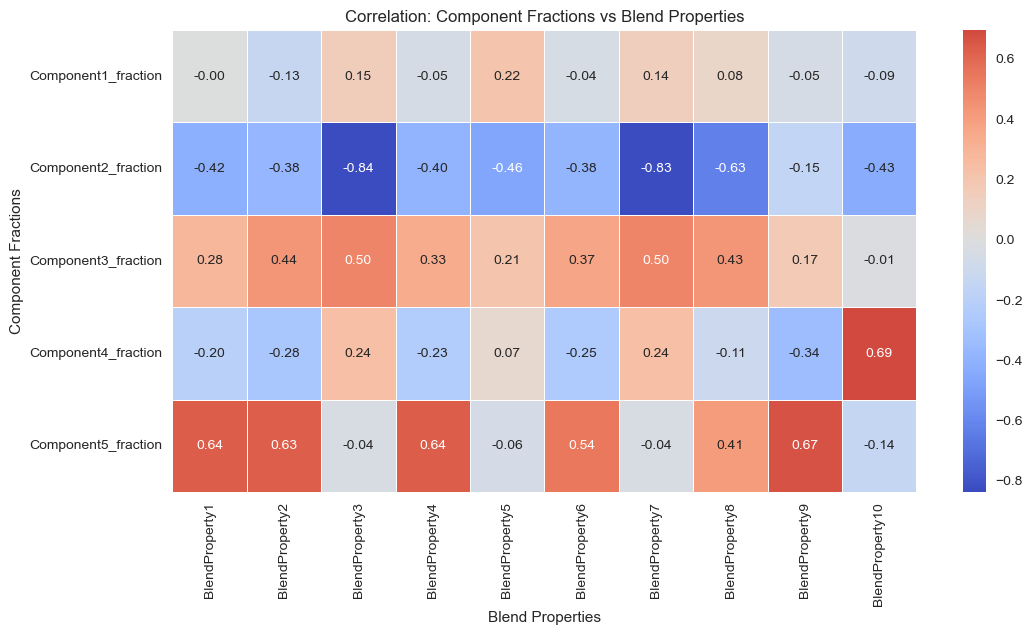


Strongest correlations between fractions and blend properties (|r| > 0.3):
Component2_fraction -> BlendProperty3: -0.838
Component2_fraction -> BlendProperty7: -0.832
Component4_fraction -> BlendProperty10: 0.695
Component5_fraction -> BlendProperty9: 0.665
Component5_fraction -> BlendProperty4: 0.641
Component5_fraction -> BlendProperty1: 0.639
Component5_fraction -> BlendProperty2: 0.630
Component2_fraction -> BlendProperty8: -0.630
Component5_fraction -> BlendProperty6: 0.541
Component3_fraction -> BlendProperty7: 0.502
Component3_fraction -> BlendProperty3: 0.498
Component2_fraction -> BlendProperty5: -0.462
Component3_fraction -> BlendProperty2: 0.436
Component3_fraction -> BlendProperty8: 0.435
Component2_fraction -> BlendProperty10: -0.434
Component2_fraction -> BlendProperty1: -0.421
Component5_fraction -> BlendProperty8: 0.405
Component2_fraction -> BlendProperty4: -0.397
Component2_fraction -> BlendProperty6: -0.385
Component2_fraction -> BlendProperty2: -0.376
Component3_fr

In [13]:
# Analyze relationship between component fractions and blend properties
print("Correlation between Component Fractions and Blend Properties:")

fraction_blend_corr = df[fraction_cols + blend_cols].corr().loc[fraction_cols, blend_cols]

plt.figure(figsize=(12, 6))
sns.heatmap(fraction_blend_corr, annot=True, cmap='coolwarm', center=0,
            linewidths=0.5, fmt='.2f')
plt.title('Correlation: Component Fractions vs Blend Properties')
plt.ylabel('Component Fractions')
plt.xlabel('Blend Properties')
plt.show()

# Find strongest correlations
strong_corrs = []
for frac in fraction_cols:
    for blend in blend_cols:
        corr_val = fraction_blend_corr.loc[frac, blend]
        if abs(corr_val) > 0.3:  # Threshold for moderate correlation
            strong_corrs.append((frac, blend, corr_val))

if strong_corrs:
    print("\nStrongest correlations between fractions and blend properties (|r| > 0.3):")
    for frac, blend, corr in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{frac} -> {blend}: {corr:.3f}")
else:
    print("\nNo strong correlations found between fractions and blend properties.")

## 5. Outlier Analysis

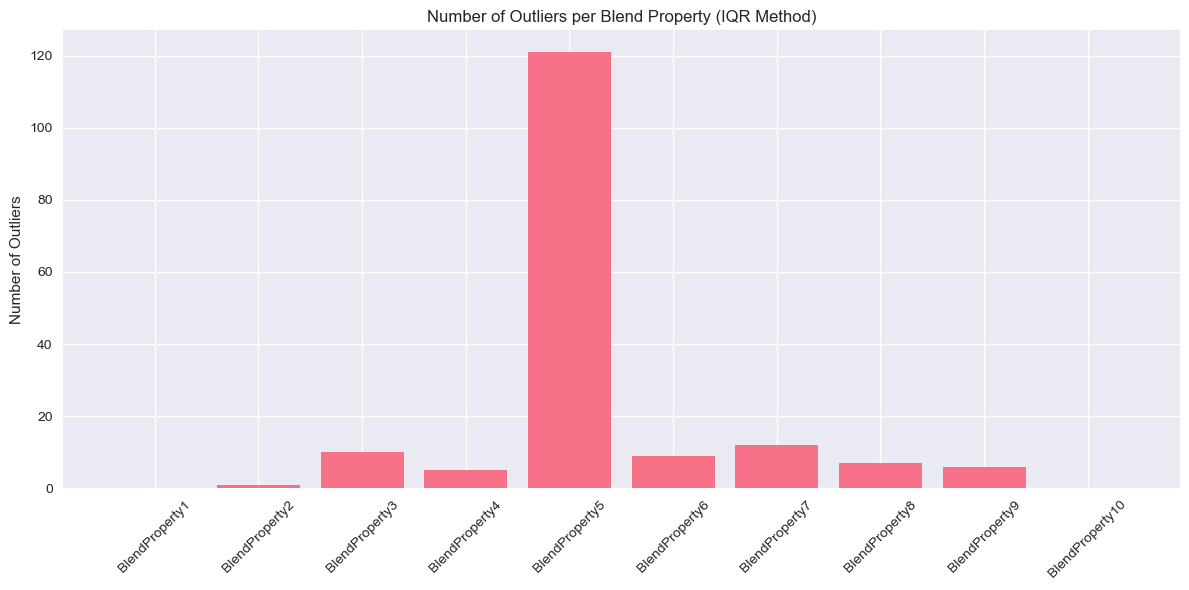

Outlier summary:
BlendProperty1: 0 outliers (0.0%)
BlendProperty2: 1 outliers (0.1%)
BlendProperty3: 10 outliers (0.5%)
BlendProperty4: 5 outliers (0.2%)
BlendProperty5: 121 outliers (6.0%)
BlendProperty6: 9 outliers (0.4%)
BlendProperty7: 12 outliers (0.6%)
BlendProperty8: 7 outliers (0.4%)
BlendProperty9: 6 outliers (0.3%)
BlendProperty10: 0 outliers (0.0%)


In [16]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check outliers in blend properties
outlier_counts = {}
for col in blend_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Plot outlier counts
plt.figure(figsize=(12, 6))
plt.bar(range(len(outlier_counts)), list(outlier_counts.values()))
plt.xticks(range(len(outlier_counts)), list(outlier_counts.keys()), rotation=45)
plt.title('Number of Outliers per Blend Property (IQR Method)')
plt.ylabel('Number of Outliers')
plt.tight_layout()
plt.show()

print("Outlier summary:")
for prop, count in outlier_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{prop}: {count} outliers ({percentage:.1f}%)")

## 6. Overall Data Quality Assessment

In [17]:
# Data quality summary
print("=== DATA QUALITY ASSESSMENT ===")
print(f"\n1. DATASET SIZE:")
print(f"   - Rows: {len(df):,}")
print(f"   - Columns: {len(df.columns)}")
print(f"   - Total values: {df.size:,}")

print(f"\n2. MISSING VALUES:")
missing_count = df.isnull().sum().sum()
print(f"   - Total missing: {missing_count}")
print(f"   - Percentage: {(missing_count/df.size)*100:.2f}%")

print(f"\n3. DATA TYPES:")
for dtype, count in df.dtypes.value_counts().items():
    print(f"   - {dtype}: {count} columns")

print(f"\n4. COMPONENT FRACTIONS:")
fraction_sums = df[fraction_cols].sum(axis=1)
valid_fractions = ((fraction_sums >= 0.99) & (fraction_sums <= 1.01)).sum()
print(f"   - Valid fraction sums (0.99-1.01): {valid_fractions}/{len(df)} ({(valid_fractions/len(df))*100:.1f}%)")

print(f"\n5. OUTLIERS (using IQR method):")
total_outliers = sum(outlier_counts.values())
print(f"   - Total outlier instances: {total_outliers}")
print(f"   - Percentage of data points: {(total_outliers/(len(df)*len(blend_cols)))*100:.1f}%")

print(f"\n6. VALUE RANGES:")
print(f"   - Component fractions: {df[fraction_cols].min().min():.3f} to {df[fraction_cols].max().max():.3f}")
print(f"   - Blend properties: {df[blend_cols].min().min():.3f} to {df[blend_cols].max().max():.3f}")

print(f"\n=== SUMMARY ===")
print(f"The dataset appears to be of high quality with:")
print(f"- No missing values")
print(f"- Consistent data types (all numeric)")
print(f"- Valid component fractions that sum to approximately 1")
print(f"- Reasonable value ranges for all features")
print(f"- Manageable number of outliers")

=== DATA QUALITY ASSESSMENT ===

1. DATASET SIZE:
   - Rows: 2,000
   - Columns: 65
   - Total values: 130,000

2. MISSING VALUES:
   - Total missing: 0
   - Percentage: 0.00%

3. DATA TYPES:
   - float64: 65 columns

4. COMPONENT FRACTIONS:
   - Valid fraction sums (0.99-1.01): 2000/2000 (100.0%)

5. OUTLIERS (using IQR method):
   - Total outlier instances: 171
   - Percentage of data points: 0.9%

6. VALUE RANGES:
   - Component fractions: 0.000 to 0.500
   - Blend properties: -3.621 to 3.770

=== SUMMARY ===
The dataset appears to be of high quality with:
- No missing values
- Consistent data types (all numeric)
- Valid component fractions that sum to approximately 1
- Reasonable value ranges for all features
- Manageable number of outliers
